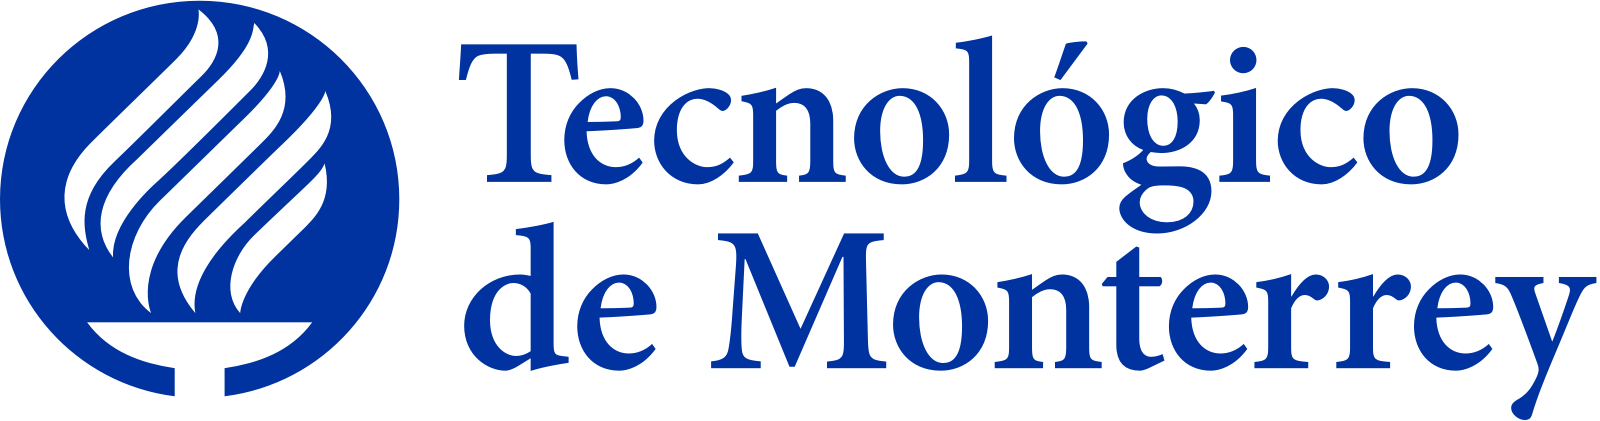

# **Master in Artificial Intelligence**

### Course: **Advanced Machine Learning Methods**

### Tecnológico de Monterrey

### Lead Professor José Antonio Cantoral Ceballos

## Team 38
*   A01794957 Tania Alicia Caballero Saavedra
*   A01283104 Kevin Dueñas Aguirre
*   A01794882 Francisco Marmolejo Martinez
*   A01795106 Francisco Javier Rupit Olvera
*   A01795093 Miguel Angel Alpizar Flores


# TC 5033
## Deep Learning
## Transfer Learning

<br>

#### Activity 2c: Exploring Transfer Learning with CIFAR-10
<br>

- Objective:

    In this activity, you'll study the concept of Transfer Learning, a powerful technique to improve the performance of your models by leveraging pre-trained architectures. The provided notebook offers a complete solution using a specific pre-trained model on the CIFAR-10 dataset. Your task is to extend this by trying out two other pre-trained models.
    
- Instructions:

    This activity should be submitted in the same format as previous activities. Remember to include the names of all team members in a markdown cell at the beginning of the notebook. The grade obtained in this notebook will be averaged with that of Activity 2b, for the grade of Activity 2.    

    Study the Provided Code: The provided notebook has a complete Transfer Learning solution using a particular pre-trained model. Make sure you understand the flow of the code and the role of each component.

    Select Two Other Pre-trained Models: Choose two different pre-trained models available in PyTorch's model zoo.

    Apply Transfer Learning: Add cells to implement Transfer Learning using the two models you've chosen. Train these models on the CIFAR-10 dataset.

    Evaluation: After training, evaluate your models' performance. Compare the results with the provided solution and try to interpret why there might be differences.

    Documentation: In a markdown cell, summarize your findings. Include any challenges you faced, how you overcame them, and any interesting insights you gained from comparing the different pre-trained models.

- Note:

    Although the provided code serves as a guide, you're encouraged to implement the new solutions on your own. The goal is to reinforce your understanding of Transfer Learning and how to apply it effectively.




In [ ]:
!pip show torch

Name: torch
Version: 2.4.1+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: accelerate, fastai, torchaudio, torchvision


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
from torchvision import models

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
DATA_PATH = "/content/drive/MyDrive/Colabs/metodos-avazandos"

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Download the dataset

In [ ]:
NUM_TRAIN = 45000
MINIBATCH_SIZE = 64

# Transformation for ImageNet-style inputs
# We're resizing the CIFAR images to 224x224
# Then we normalize with ImageNet's mean and std dev values
transform_imagenet = T.Compose([
                T.Resize(224),
                T.ToTensor(),
                T.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
            ])

# Another transformation, but for CIFAR-10 specifically
# These are CIFAR-10's mean and std dev values
transform_cifar = T.Compose([
                T.ToTensor(),
                T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])
            ])

# Now, we set up our training data loader
# We're using the ImageNet-style transformations even though this is CIFAR-10
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform_imagenet)
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))

# Same thing but for validation data
# We're pulling out the remaining 5,000 samples from the training set for validation
cifar10_val = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                           transform=transform_imagenet)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, len(cifar10_val))))

# Finally, the testing set loader
# Test data uses the same transformations
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                            transform=transform_imagenet)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
for i, (x, y) in enumerate(val_loader):
    print(i, x.shape, y.shape)

0 torch.Size([64, 3, 224, 224]) torch.Size([64])
1 torch.Size([64, 3, 224, 224]) torch.Size([64])
2 torch.Size([64, 3, 224, 224]) torch.Size([64])
3 torch.Size([64, 3, 224, 224]) torch.Size([64])
4 torch.Size([64, 3, 224, 224]) torch.Size([64])
5 torch.Size([64, 3, 224, 224]) torch.Size([64])
6 torch.Size([64, 3, 224, 224]) torch.Size([64])
7 torch.Size([64, 3, 224, 224]) torch.Size([64])
8 torch.Size([64, 3, 224, 224]) torch.Size([64])
9 torch.Size([64, 3, 224, 224]) torch.Size([64])
10 torch.Size([64, 3, 224, 224]) torch.Size([64])
11 torch.Size([64, 3, 224, 224]) torch.Size([64])
12 torch.Size([64, 3, 224, 224]) torch.Size([64])
13 torch.Size([64, 3, 224, 224]) torch.Size([64])
14 torch.Size([64, 3, 224, 224]) torch.Size([64])
15 torch.Size([64, 3, 224, 224]) torch.Size([64])
16 torch.Size([64, 3, 224, 224]) torch.Size([64])
17 torch.Size([64, 3, 224, 224]) torch.Size([64])
18 torch.Size([64, 3, 224, 224]) torch.Size([64])
19 torch.Size([64, 3, 224, 224]) torch.Size([64])
20 torch.S

### Check GPU | cuda

In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(device)

cuda


### Review images

La imagen muestreada representa un: Frog


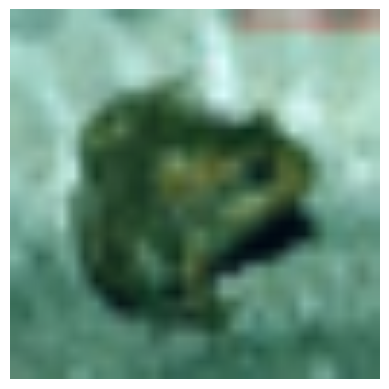

In [ ]:
# These are the class names for CIFAR-10.
classes = ['Plane', 'Car', 'Bird', 'Cat', 'Deer','Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Function to plot the image
def plot_figure(image):
    plt.imshow(image.permute(1,2,0))
    plt.axis('off')
    plt.show()

# Pick a random sample from the test loader
rnd_sample_idx = np.random.randint(len(test_loader))

print(f'La imagen muestreada representa un: {classes[test_loader.dataset[rnd_sample_idx][1]]}')

# Grab the image tensor from the dataset
image = test_loader.dataset[rnd_sample_idx][0]
# Normalize the image between 0 and 1
image = (image - image.min()) / (image.max() -image.min() )
# Plot the image with our handy function
plot_figure(image)

### Creating the model

In [ ]:
def create_model_aux (model_input):
  # Load the model based on the user's choice
  if model_input == 'resnet18':
    model_preLoaded = models.resnet18(pretrained=True)
  elif model_input == 'densenet161':
    model_preLoaded = models.densenet161(pretrained=True)
  elif model_input == 'vgg16':
    model_preLoaded = models.vgg16(pretrained=True)

  #Explorar el modelo
  #crear arreglo
  #for i, w in enumerate(model_preLoaded.parameters()):
  #  print(i, w.shape, w.requires_grad)

  # We're going to modify the model by chopping off the last layer
  # This is useful when we're fine-tuning for a different task
  model_aux = nn.Sequential(*list(model_preLoaded.children())[:-1])

  # Freeze the parameters of the remaining layers so we don't train them
  for i, parameter in enumerate(model_aux.parameters()):
    parameter.requires_grad = False # No gradients for these layers, we're not training them
    #print(i, parameter.requires_grad)

  return model_aux

### Training function

In [ ]:
def train(model, optimiser, epochs=100):
    # Send the model to the GPU (or CPU if a GPU isn't available)
    model = model.to(device=device)

    # Loop through the number of epochs
    for epoch in range(epochs):
        for i, (xi, yi) in enumerate(train_loader):
            # Set the model to training mode
            model.train()
            # Move the input data (xi) and labels (yi) to the GPU (or CPU if no GPU)
            xi = xi.to(device=device, dtype=torch.float32)
            yi = yi.to(device=device, dtype=torch.long)
            # Get the model's predictions
            scores = model(xi)

            # Calculate the loss
            cost = F.cross_entropy(input= scores, target=yi)

            # Zero out the gradients
            optimiser.zero_grad()
            # Backpropagate the loss
            cost.backward()
            # Update the model's parameters based on the gradients
            optimiser.step()

        # Check the accuracy on the validation set after each epoch
        acc = accuracy(model, val_loader)

        print(f'Epoch: {epoch}, costo: {cost.item()}, accuracy: {acc},')


### Accuracy function

In [ ]:
def accuracy(model, loader):
    num_correct = 0
    num_total = 0
    model.eval()
    # Move the model to the GPU (or CPU)
    model = model.to(device=device)
    # Disable gradient calculation, since we're only evaluating the model
    with torch.no_grad():
        for (xi, yi) in loader:
            xi = xi.to(device=device, dtype = torch.float32)
            yi = yi.to(device=device, dtype = torch.long)
            # Get the model's predictions
            scores = model(xi) # mb_size, 10
            # Pick the class with the highest score as the predicted class
            _, pred = scores.max(dim=1) #pred shape (mb_size )
            # Count how many predictions were correct
            num_correct += (pred == yi).sum() # pred shape (mb_size), yi shape (mb_size, 1)
            # Keep track of how many samples we've processed
            num_total += pred.size(0)
        # Return the accuracy as a float
        return float(num_correct)/num_total



##Pretrained model

In [ ]:
def pretrained_model(model_val, in_features_val, hidden_val, hidden1_val, lr_val, epochs_val):
  from ast import mod
  # Set up the hidden layer sizes, learning rate, and number of epochs
  hidden1 = hidden1_val
  hidden = hidden_val
  lr = lr_val
  epochs = epochs_val

  # Use our custom function to load and modify a pre-trained model
  model_aux = create_model_aux(model_val)

  # Stack the pre-trained model with a few new layers on top for our specific task
  # We're flattening the output of the pre-trained model and adding a new Linear layer for classification
  model1 = nn.Sequential(model_aux,
                       nn.Flatten(),
                       nn.Linear(in_features=in_features_val, out_features= 10, bias= True))

  # Set up the Adam optimizer with the model's parameters and our chosen learning rate
  optimiser = torch.optim.Adam(model1.parameters(), lr=lr, betas=(0.9, 0.999))

  print("Model Training")
  train(model1, optimiser, epochs)

  # Once training is done, let's check the accuracy
  print("Model Accuracy")
  accuracy_val = accuracy(model1, test_loader) # Evaluate the model's accuracy on the test set
  print(f'Accuracy: {accuracy_val}')
  return model1

###Pytorch pretrained model

In [ ]:
#pretrained_model('resnet18|vgg16|densenet161', in_features_val, hidden_val, hidden1_val, lr_val, epochs_val)

# 'resnet18': We're using ResNet18 as the pre-trained model
# 512: The number of input features to the final Linear layer
# 256: Hidden layer size
# 256: Another hidden layer size)
# 5e-4: Learning rate (0.0005)
# 1: Number of epochs for training
model1=pretrained_model('resnet18', 512, 256, 256, 5e-4, 3 )

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 180MB/s]


Model Training
Epoch: 0, costo: 0.8508794903755188, accuracy: 0.7786,
Epoch: 1, costo: 0.9335074424743652, accuracy: 0.7958,
Epoch: 2, costo: 0.33051931858062744, accuracy: 0.7998,
Model Accuracy
Accuracy: 0.7982


In [ ]:
#pretrained_model('resnet18|vgg16|densenet161', in_features_val, hidden_val, hidden1_val, lr_val, epochs_val)

# 'densenet161': We're using DenseNet161 as the pre-trained model here
# 108192: This is the number of input features to the final Linear layer
# 256: Hidden layer size
# 256: Another hidden layer size
# 5e-4: Learning rate (0.0005
# 3: Number of epochs to train the model
model1=pretrained_model('densenet161', 108192, 256, 256, 5e-4, 3 )

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet161_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet161_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth
100%|██████████| 110M/110M [00:00<00:00, 203MB/s] 


Model Training
Epoch: 0, costo: 0.3142300248146057, accuracy: 0.837,
Epoch: 1, costo: 2.235172757991677e-07, accuracy: 0.8534,
Epoch: 2, costo: 1.2024810314178467, accuracy: 0.8582,
Model Accuracy
Accuracy: 0.8552


In [ ]:
#pretrained_model('resnet18|vgg16|densenet161', in_features_val, hidden_val, hidden1_val, lr_val, epochs_val)

# 'vgg16': We're using VGG16 as the pre-trained model here.
# 25088: This is the number of input features to the final Linear layer after flattening VGG16's output.
# VGG16 outputs 25088 features after the last convolutional layer.
# 256: Hidden layer size
# 256: Another hidden layer size
# 5e-4: Learning rate (0.0005)
# 3: Number of epochs
model1=pretrained_model('vgg16', 25088, 256, 256, 5e-4, 3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 212MB/s]


Model Training
Epoch: 0, costo: 0.4186427593231201, accuracy: 0.8584,
Epoch: 1, costo: 0.24077171087265015, accuracy: 0.8626,
Epoch: 2, costo: 0.1832129955291748, accuracy: 0.873,
Model Accuracy
Accuracy: 0.866


### Reviewing the model

In [ ]:
model1

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      (16): M

###Test the model

In [ ]:
def predict(x, model):
    # Move the input `x` (could be an image or batch of images) to the GPU
    # Convert it to a float tensor
    model = model.to(device)
    x = x.to(device=device, dtype = torch.float32)
    # Pass the input through the model to get the raw scores (logits) for each class
    with torch.no_grad():
      scores = model(x) # mb_size, 10
    _, pred = scores.max(dim=1) #pred shape (mb_size )

    # Return the predicted class indices
    return pred

The Image is: Frog


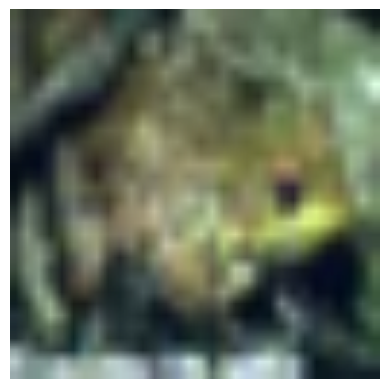

The image predited is Frog


In [ ]:
# Pick a random sample index from the test dataset
rnd_sample_idx = np.random.randint(len(test_loader))
# Print the true label of the randomly selected image
print(f'The Image is: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
image = test_loader.dataset[rnd_sample_idx][0]
# Normalize the image between 0 and 1 for proper visualization
image = (image - image.min()) / (image.max() -image.min() )
plot_figure(image)
# Pass the image to the model for prediction
# .unsqueeze(0) adds a batch dimension, so the model can handle it like a batch of 1 image
pred=predict(test_loader.dataset[rnd_sample_idx][0].unsqueeze(0), model1)
# Print out the predicted class
print(f'The image predited is {classes[pred.item()]}')

##Findings

We experimented with three pre-trained models: ResNet18, VGG16, and DenseNet161, using CIFAR-10 data. All models were fine-tuned, and each showed distinct behaviors:

*  ResNet18(18 layers Conv or FC): It performs well, relatively fast compared to the other two models, but it has the lowest accuracy.
*  VGG16(16 layers Conv or FC): Fewer layers than ResNet18 and DenseNet161. It yields the best results among the three

*  DenseNet161(123 layers Conv or FC): The most complex of the three models. Its performance is similar to VGG16 and better than ResNet18.

###Challenges
Set the input size: Adjusting the input size of the last layer to fit the data was a bit tricky, but it can be resolved by reviewing the last layers of the model and documentation to obtain the value.

Processing time: DenseNet161, being a complex model, consumes too many resources when training the model. The number of epochs was reduced to decrease the waiting time.


###Insights
Models with a more complex architecture like DenseNet161 can achieve better results, but at a higher processing cost.

For smaller datasets, lighter models (e.g., ResNet18) can offer a good balance between performance and resource efficiency.

Having max pooling and batch normalization within the models helps to achieve better results